# Analysis of Experimental Data

Most of the analysis is the same for experiments and simulations.
The comparison across conditions is implemented in a stand-alone script `ana/process_conditions.py`, that can be run from a terminal and takes a the following arguments:
* `-i` the base path to the folder where the data is stored.
* `-t` the type of experiment (yields the right subfolders and file names):
    - `exp` for main results, from optogenetic stimulation and different topologies
    - `exp_chemical` for the experiments with KCl
    - `exp_bic` for the experiments with Bicuculline
    - `sim_partial` for simulations where only part of the system was targeted.
* `-o` where to store the output path.

To create the preprocessed data, navigate to the base directory and run:
```bash
python ./ana/process_conditions.py -t exp -i ./dat/experiments/raw/  -o ./dat/experiments/processed/
python ./ana/process_conditions.py -t exp_chemical -i ./dat/experiments/raw/ -o ./dat/experiments/processed/
python ./ana/process_conditions.py -t exp_bic -i ./dat/experiments/raw/ -o ./dat/experiments/processed/
```

This should yield the following files:

```bash
>>> tree -L 2 --dirsfirst ./dat/experiments/processed/
dat/experiments/processed/
├── 1b
│   ├── 210315_A
│   ├── 210315_C
│   ├── 210405_C
│   ├── 210406_B
│   ├── 210406_C
│   ├── 210719_B
│   ├── 210719_C
│   └── 210726_B
├── 3b
│   ├── 210316_A
│   ...
├── Bicuculline_1b
│   ├── 210907_1bB
│   ...
├── KCl_1b
│   ├── 210420_C
│   ...
├── merged
│   ├── 210401_A
│   ...
├── 1b.hdf5
├── 3b.hdf5
├── Bicuculline_1b.hdf5
├── KCl_1b.hdf5
└── merged.hdf5
```

where the `*.hdf5` files contain the preprocessed data and the folders for each experiment have some additional info. See also `save_analysed_h5f` in `ana/process_conditions.py`.

Low-level plotting functions are contained in `ana/plot_helper.py` and
the higher-level wrappers as well as further analysis are in `ana/paper_plots.py`.
In particular, most contend of this notebook can also be found in `paper_plots.py/fig_x()`

Experiments are depicted in Figures 1 and 2, and in the Supplemental Material.
For fine-grained control, we produced every figure panel as a stand-alone and combined them later.

In [ ]:
# The autoreload extension allows you to tweak the code in the imported modules (`pp`)
# and rerun cells to reflect the changes.
%load_ext autoreload
%autoreload 2
%load_ext ipy_dict_hierarchy
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import sys
sys.path.append("../ana/")

import paper_plots as pp
# reduce the printed output, we have lots of details on the INFO level.
pp.log.setLevel("WARNING")


    Wrapper for Figure 1 containing
    - an example raster plot for single-bond topology
        at the stimulation conditions pre | stim | post
    - an example raster plot of the single-bond controls exposed to KCl ("chemical")
    - Trial-level "stick" plots for Functional Complexity and Event Size,
        * comparing pre (left) vs stim (right)
        * for optogenetic stimulation (yellow) and chemical (gray)
    


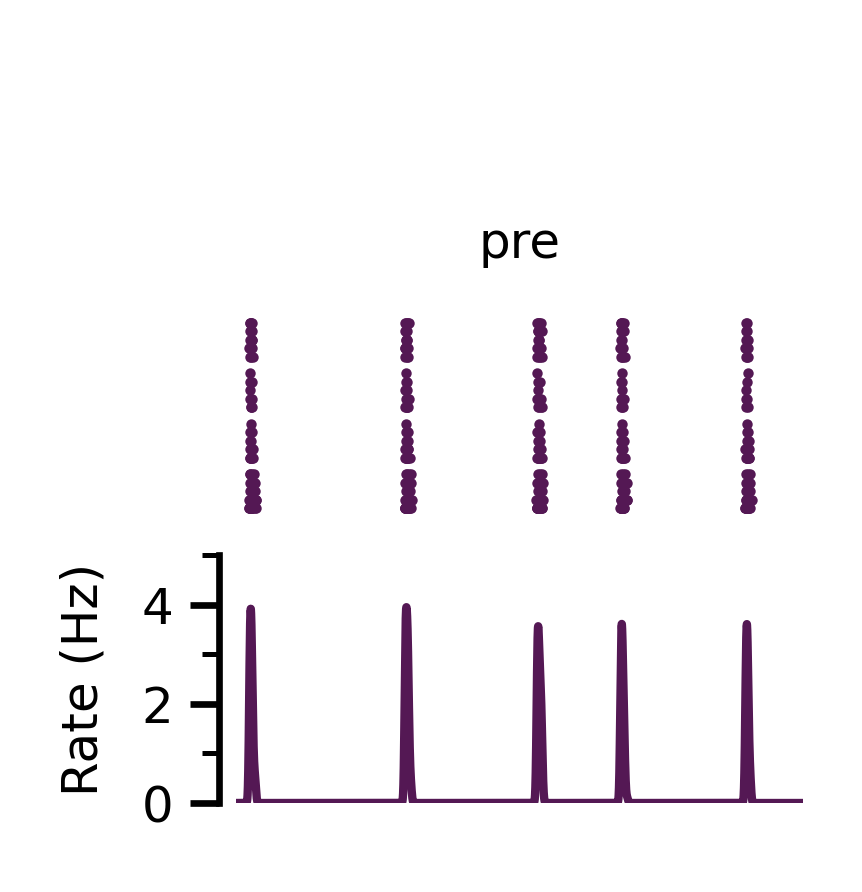

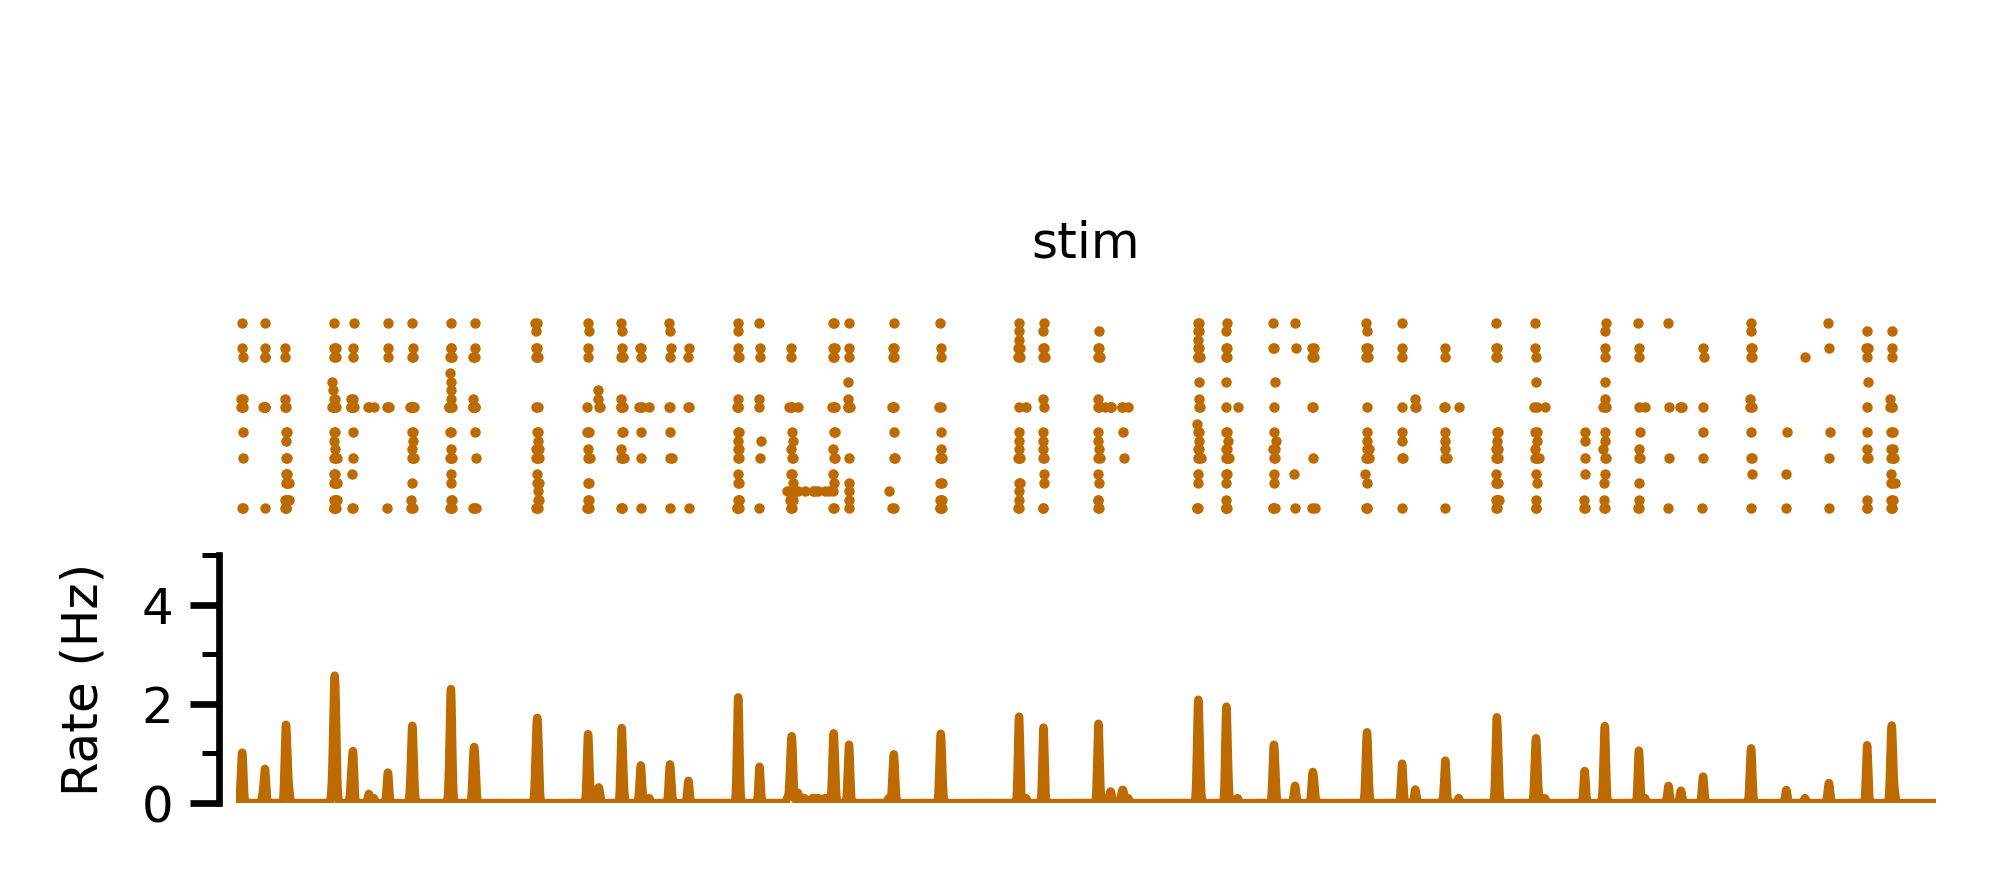

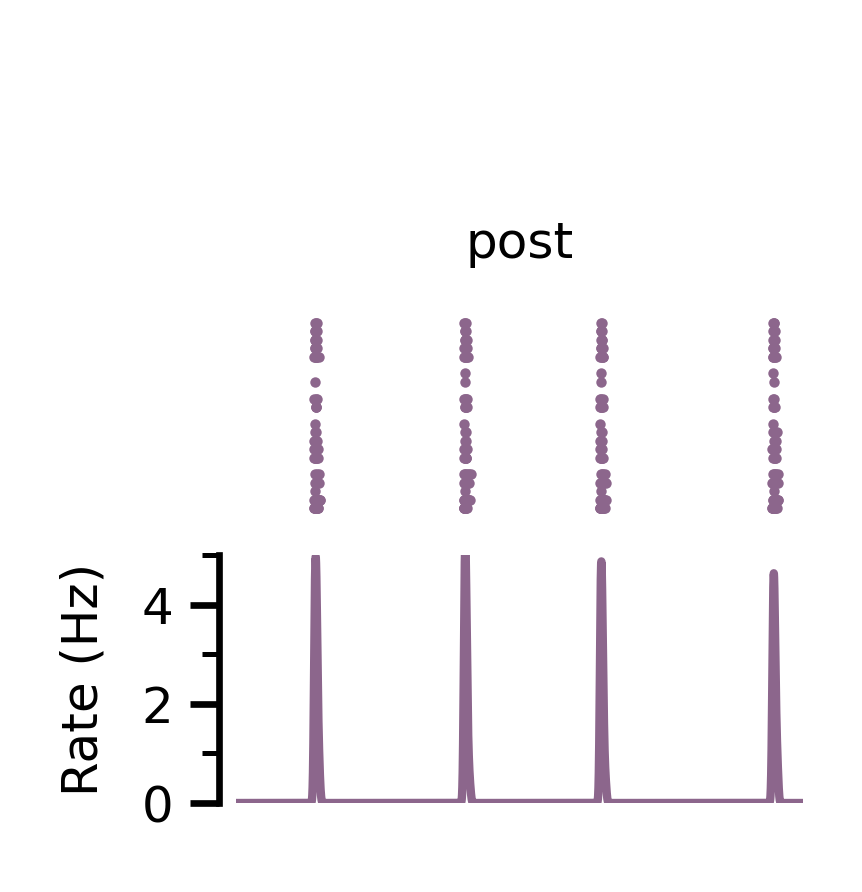

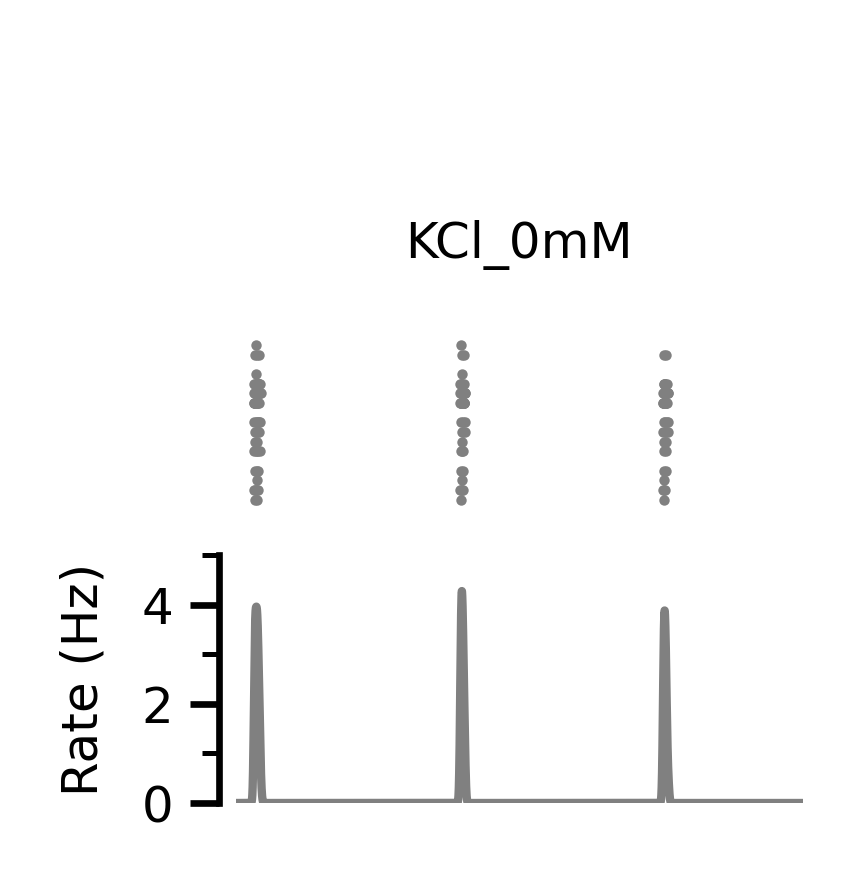

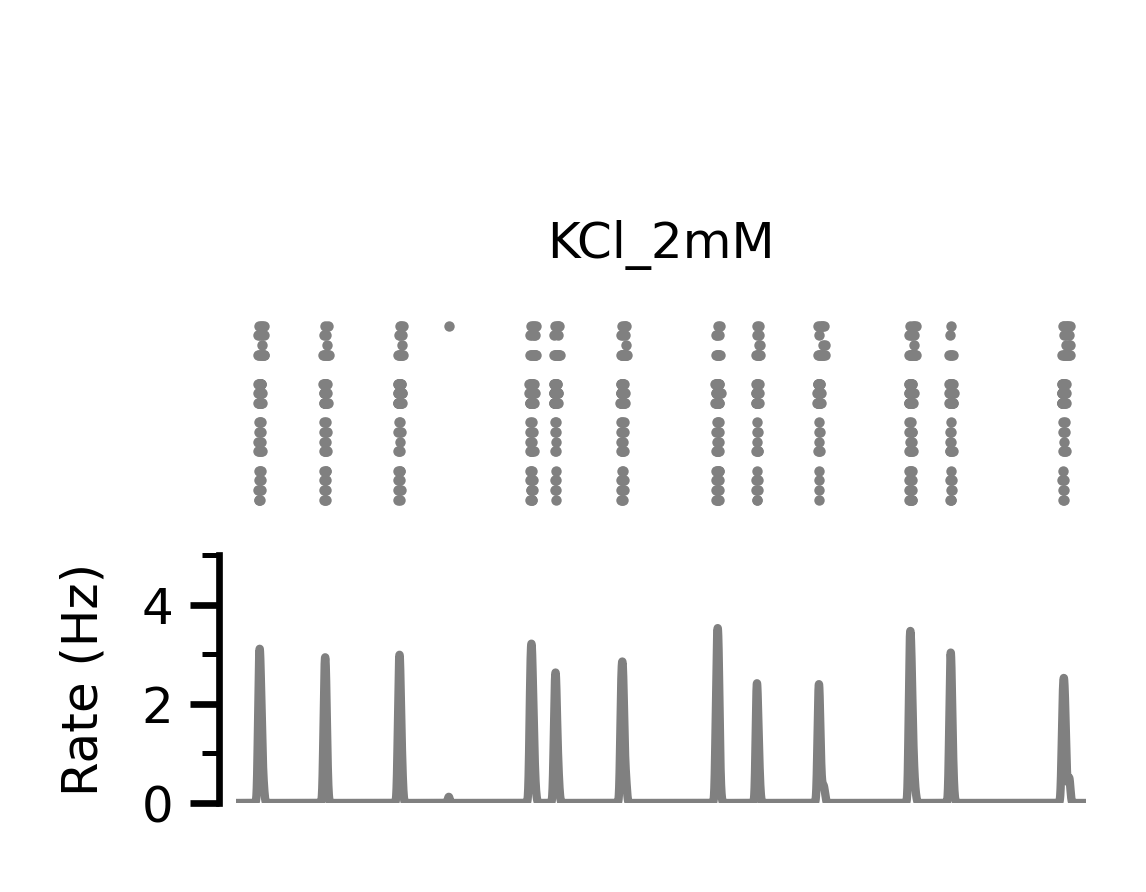

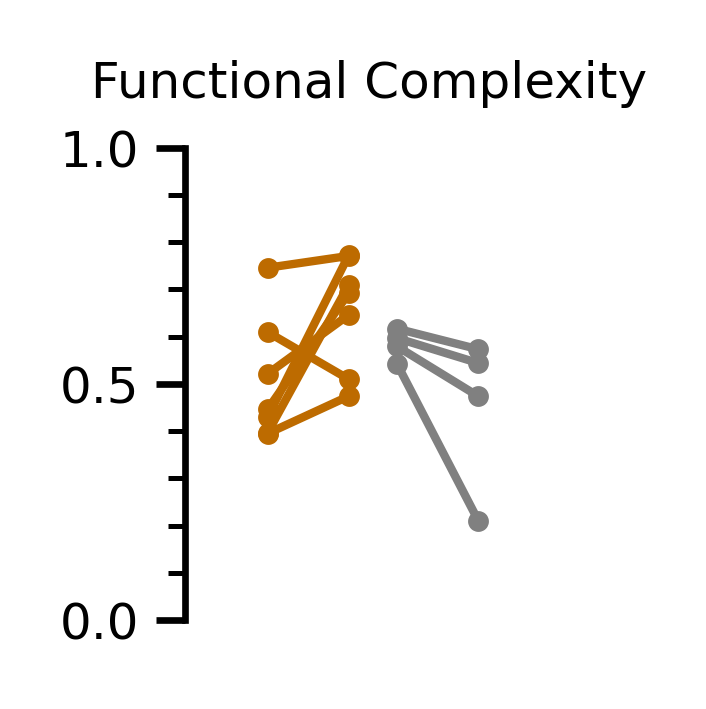

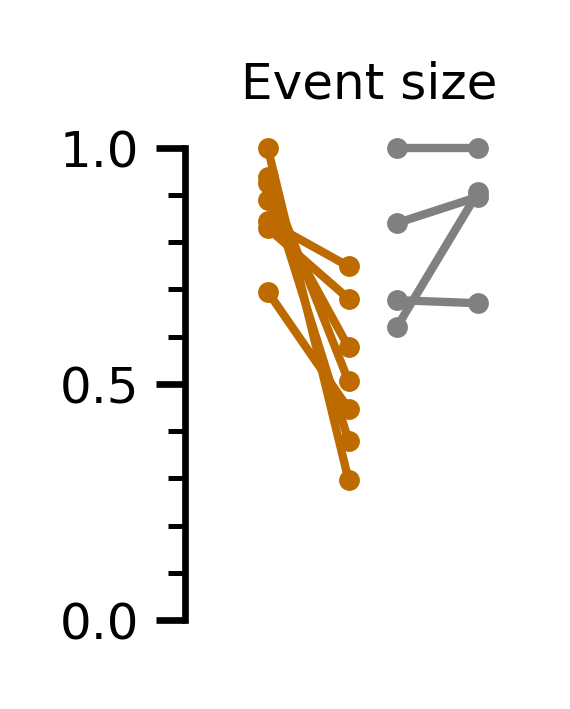

In [2]:
print(pp.fig_1.__doc__)
pp.fig_1()


    Wrapper for Figure 2 containing
    - pooled Violins that aggregate the results of all trials for
        * observables: Event size, Correclation Coefficient, IEI, Burst-Core delay
        * sorted by topology: single-bond | triple-bond | merged
        * for conditions: pre | stim | post,
    - Decomposition plots (scatter and bar) that show Correlation Coefficients
        * sorted by the location of the neuron pairs:
            - both targeted (yellow)
            - both not targeted (blue)
            - either one targeted (red)
        * for conditions: pre (dark) vs stim (light)
    - Trial level stick plots of FC for all topologies, 1-b, 3-b, merged
    


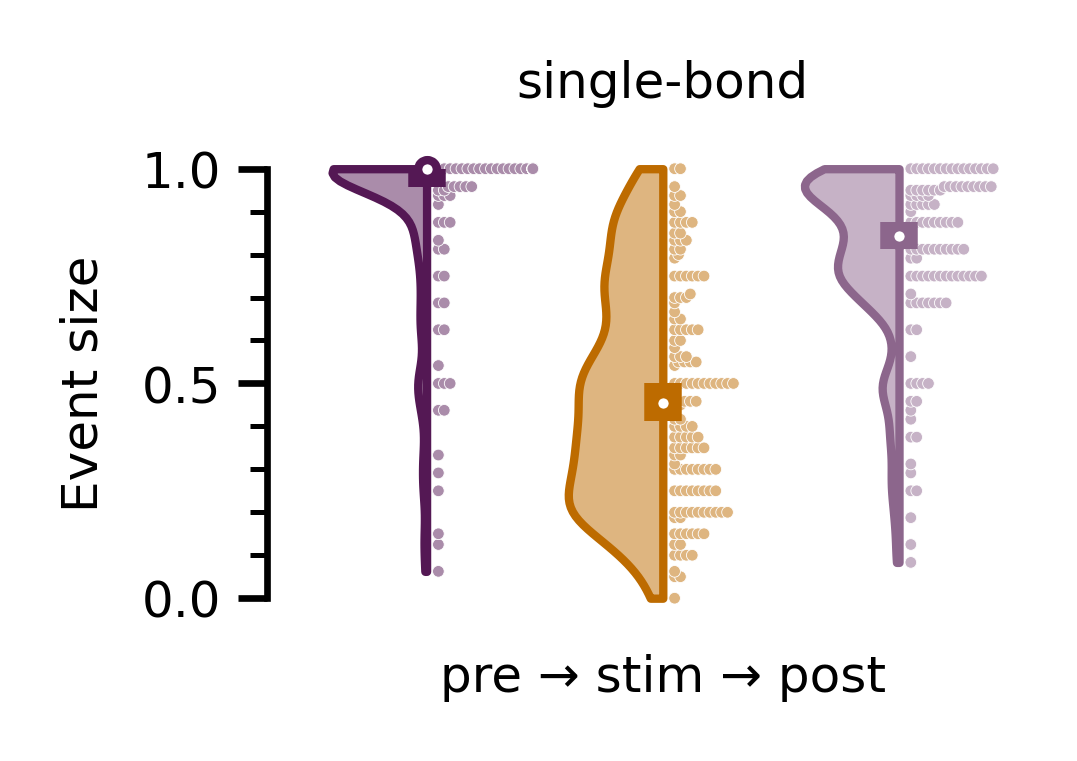

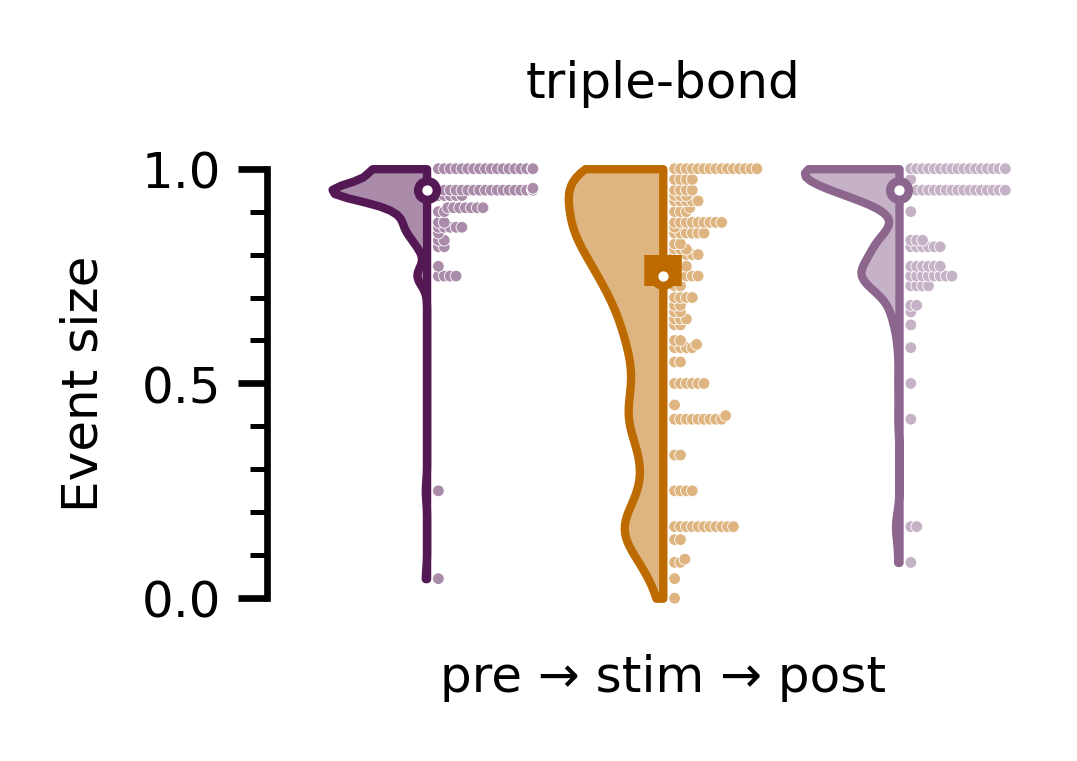

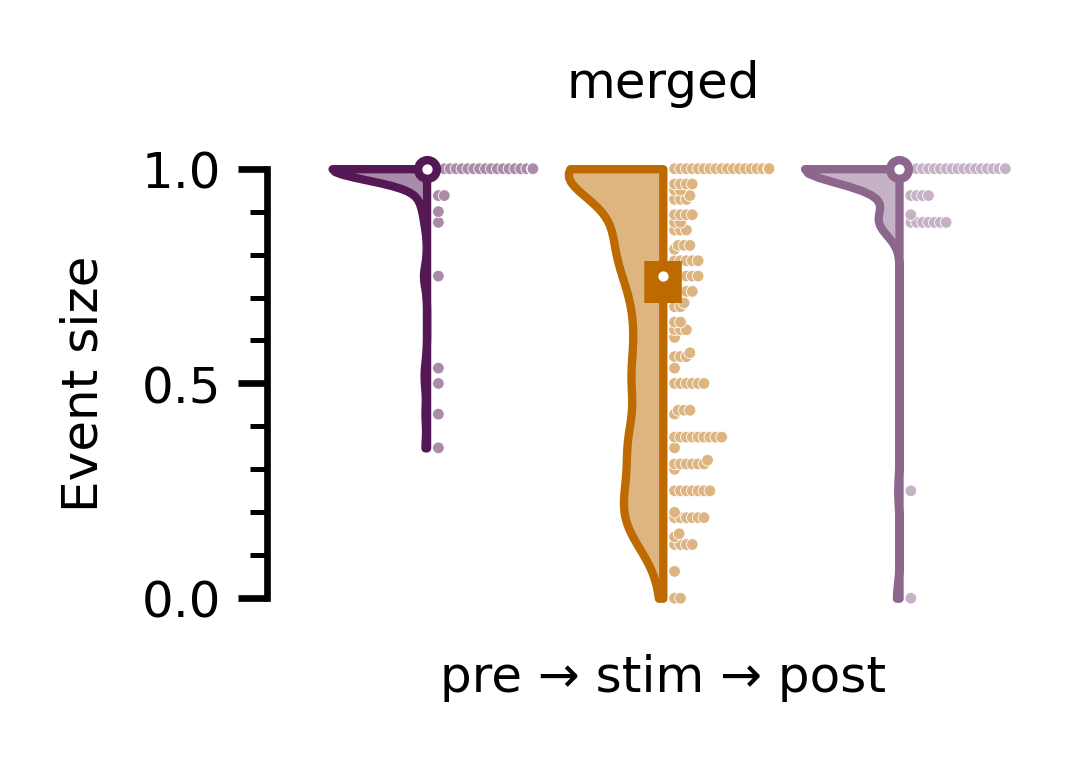

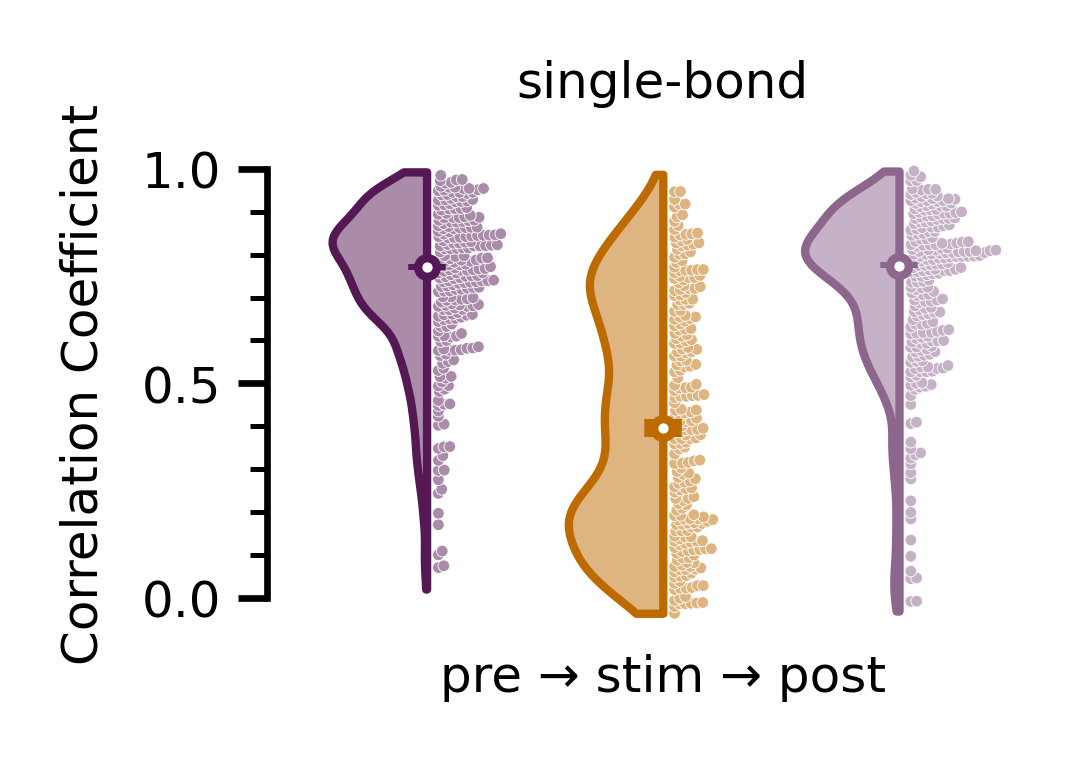

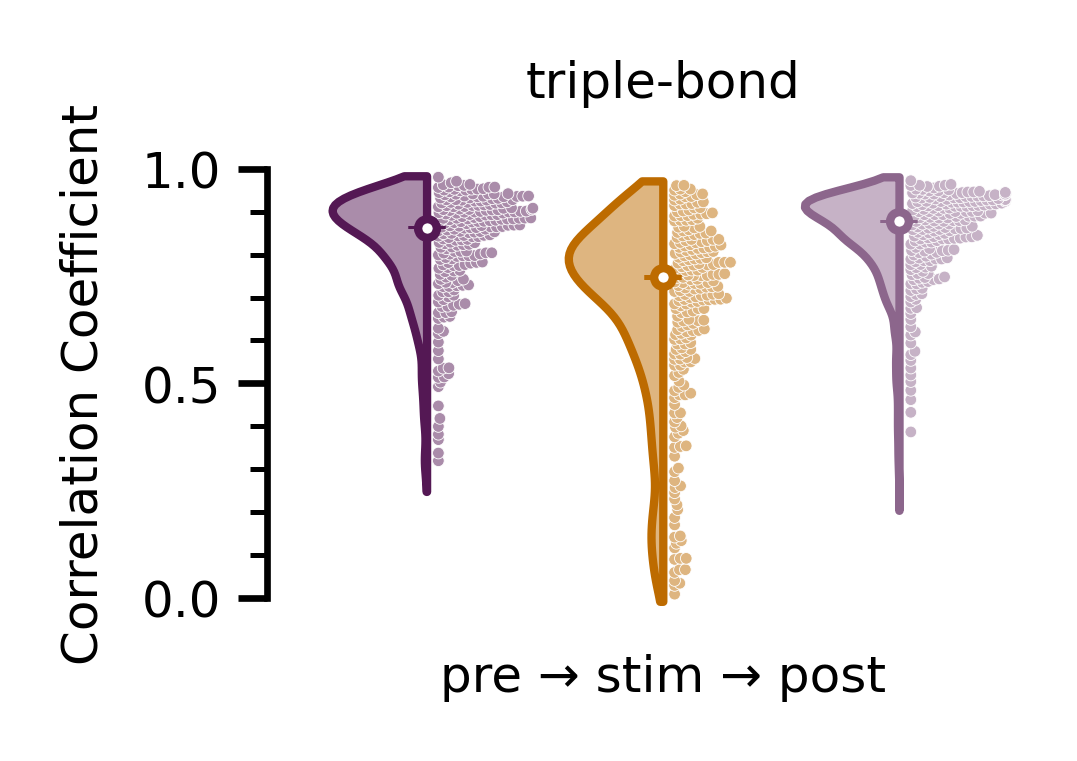

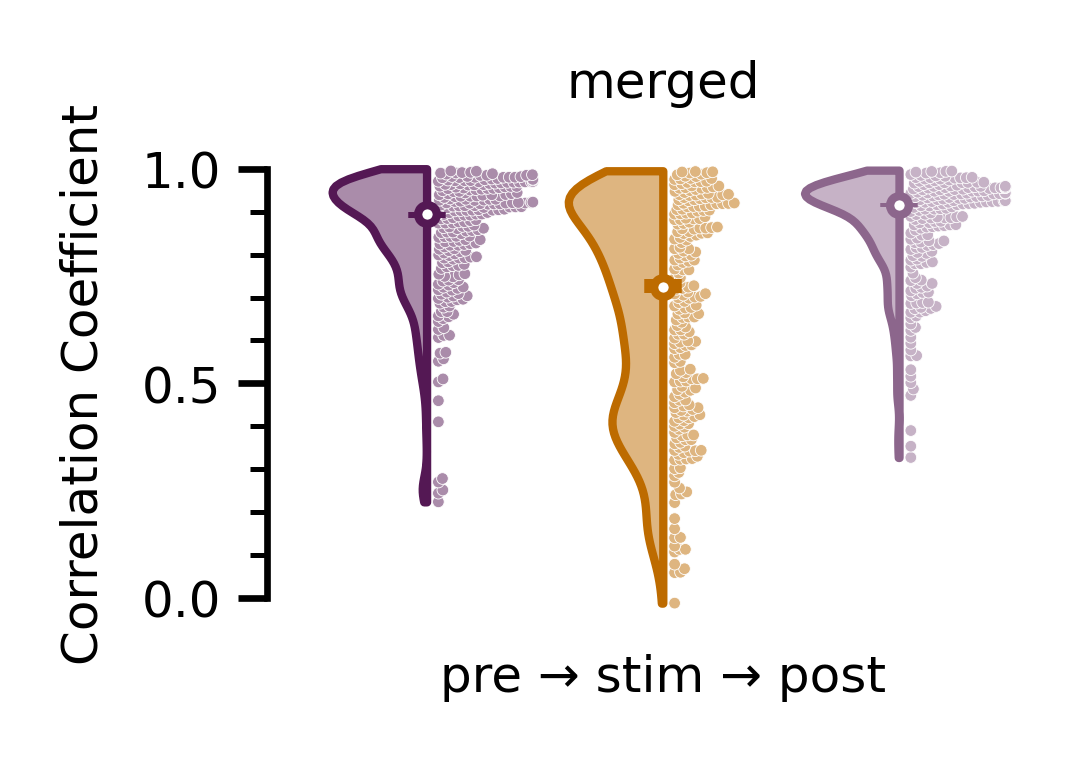

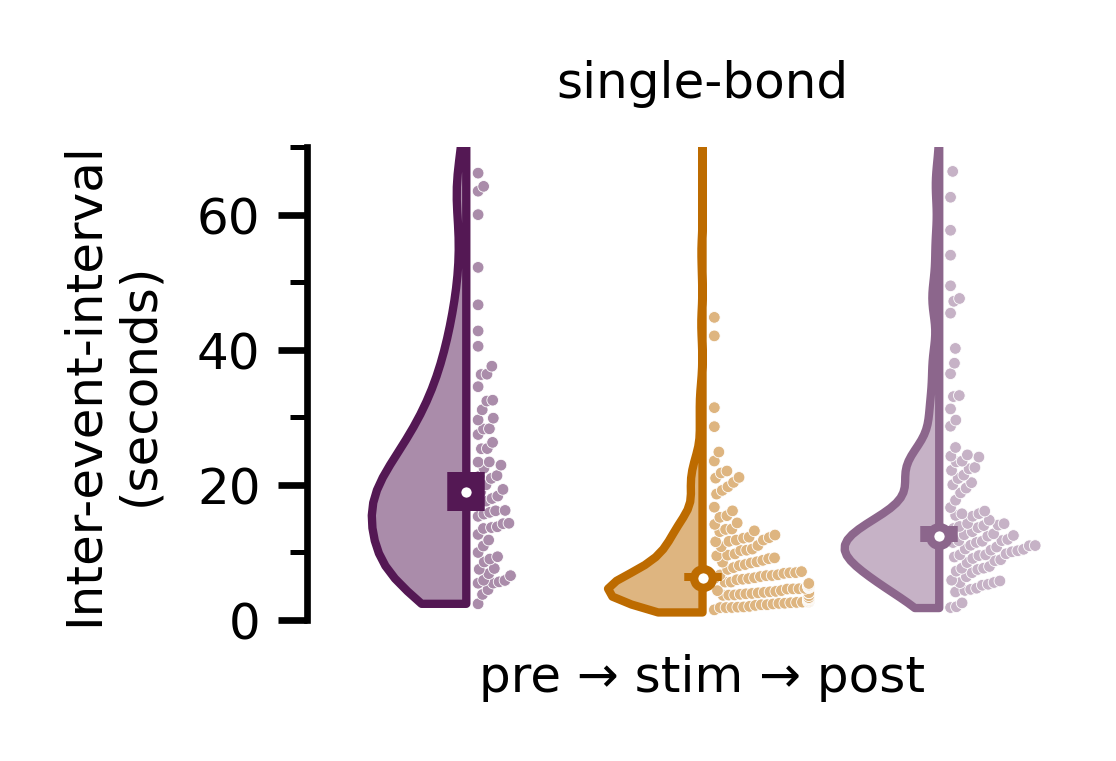

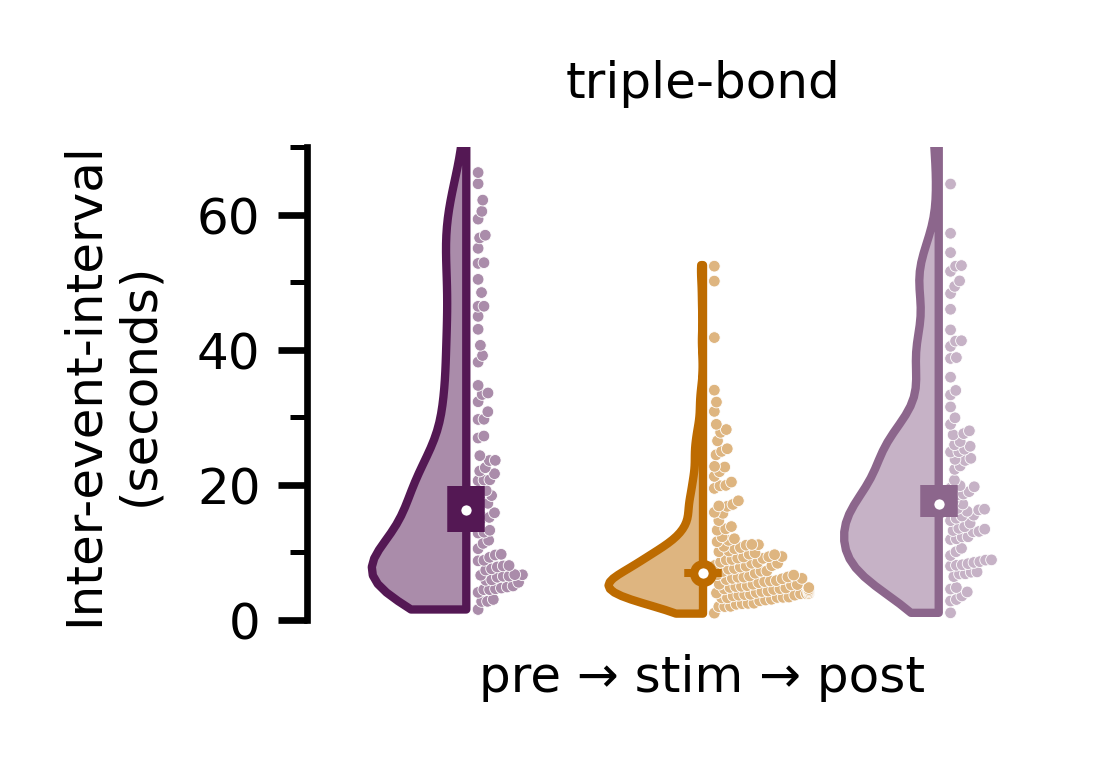

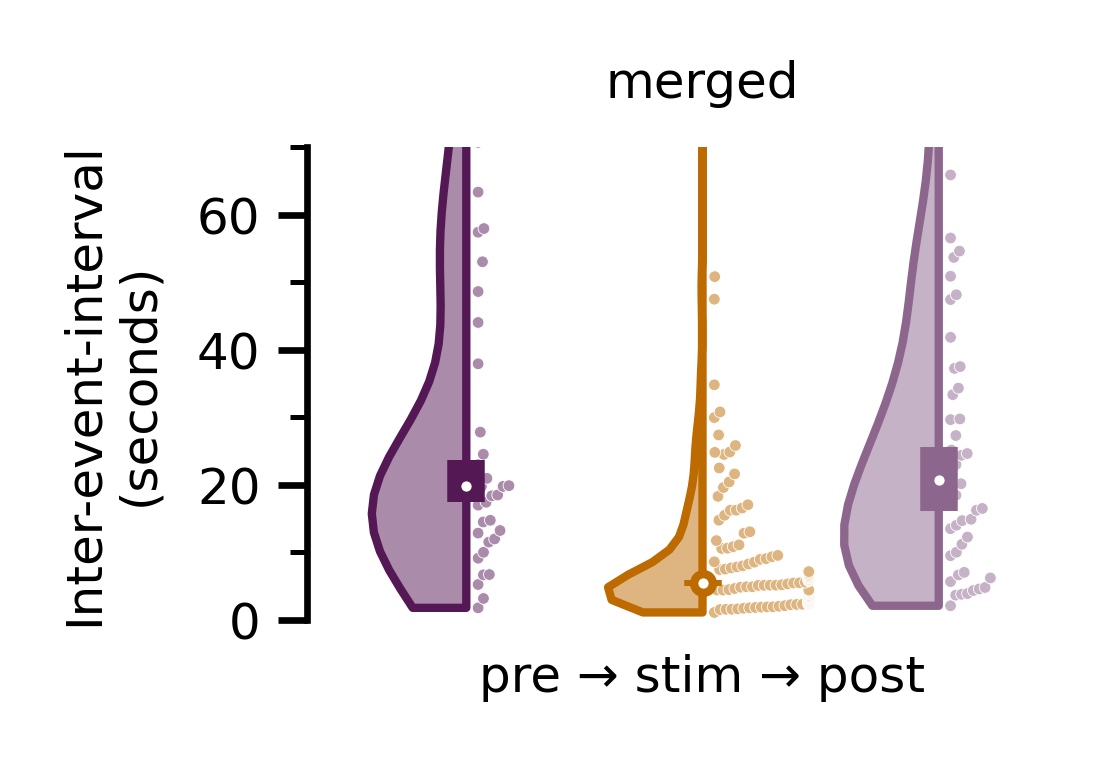

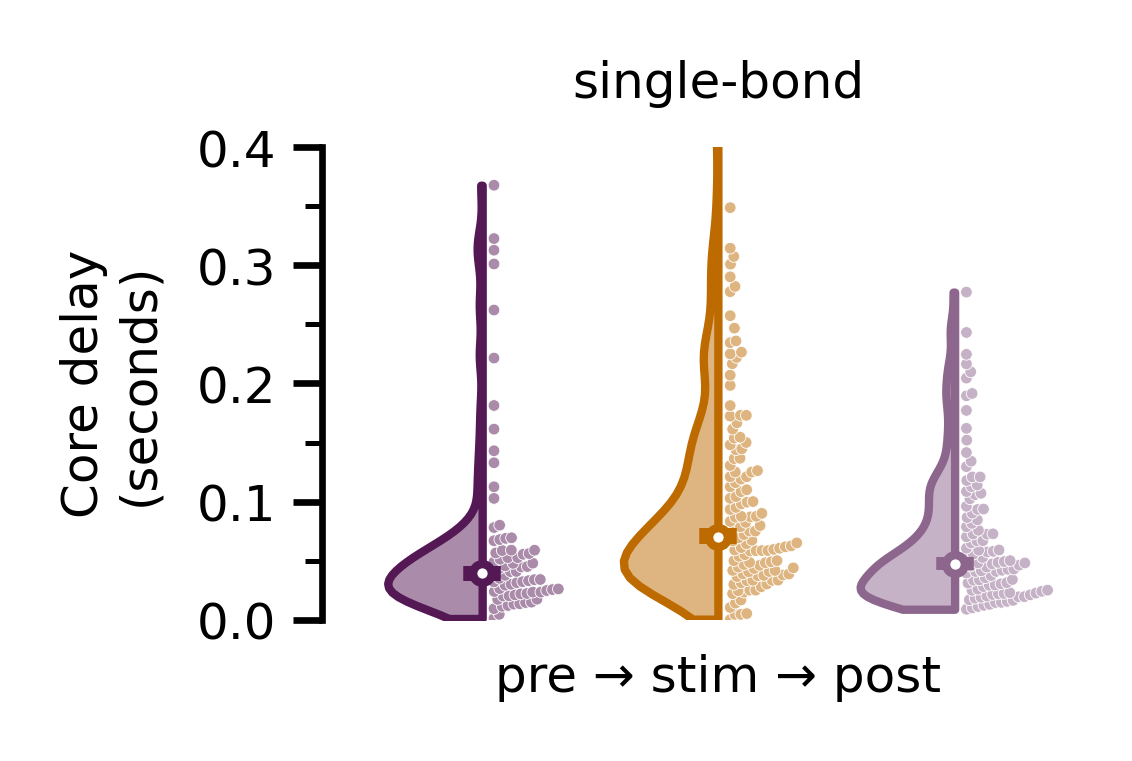

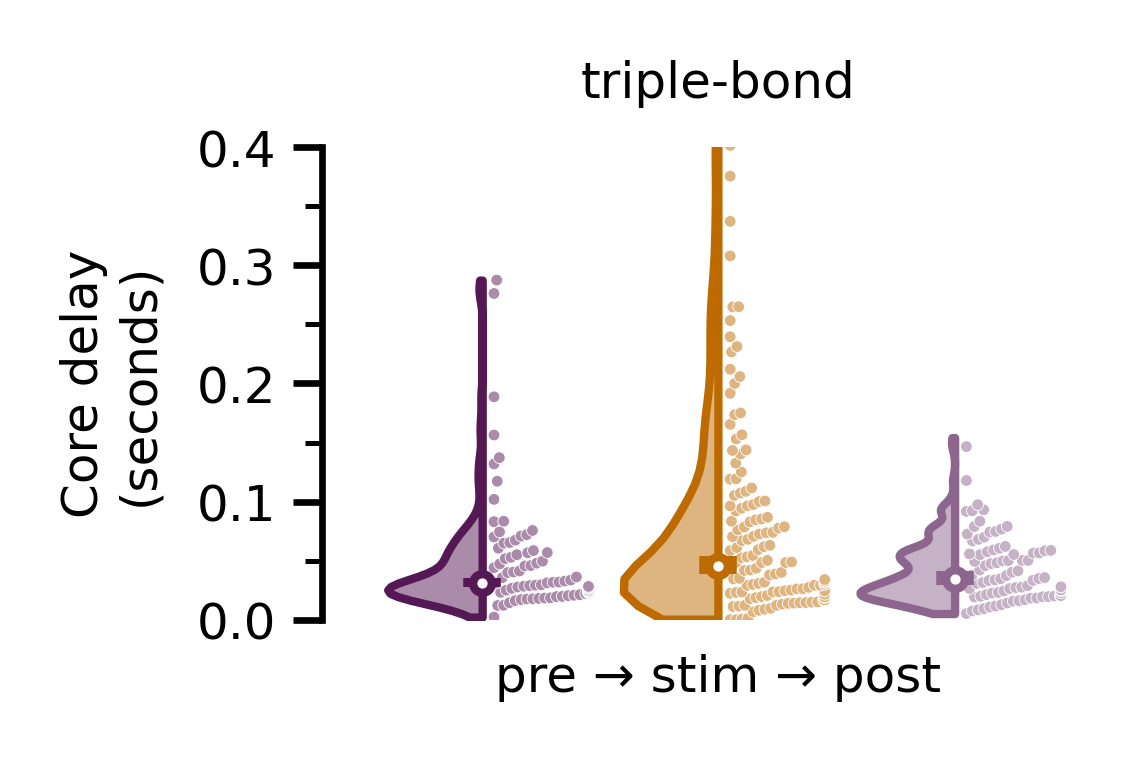

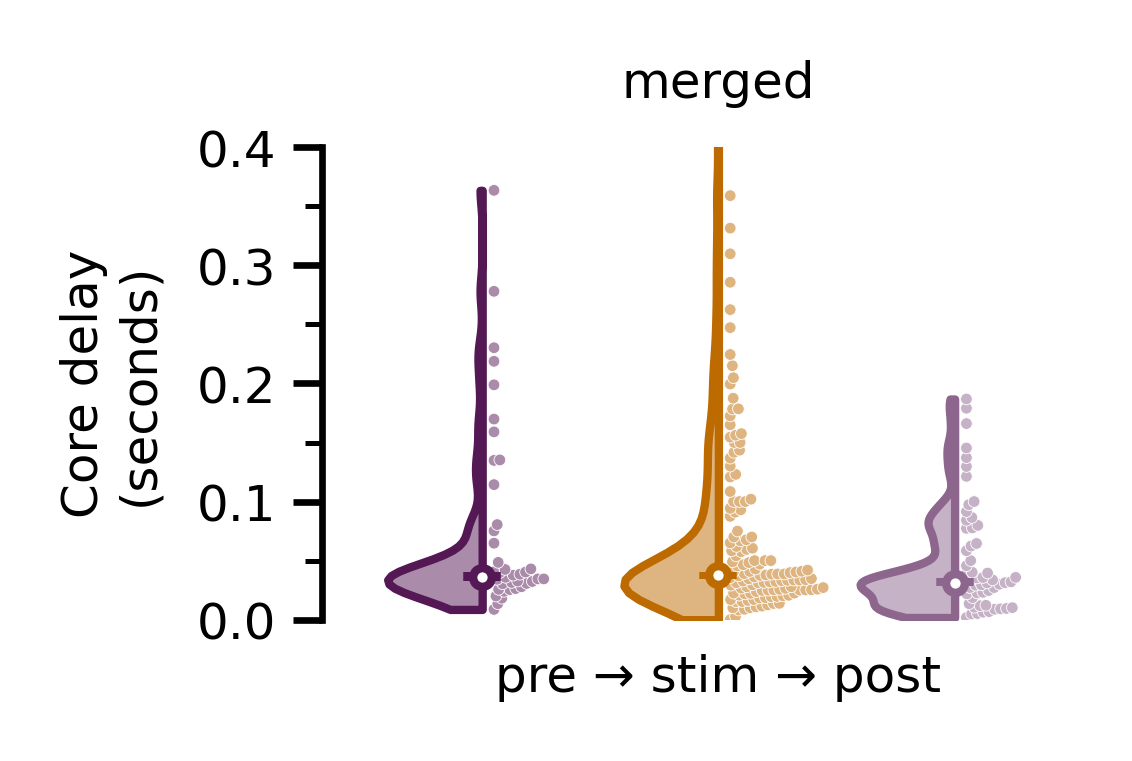

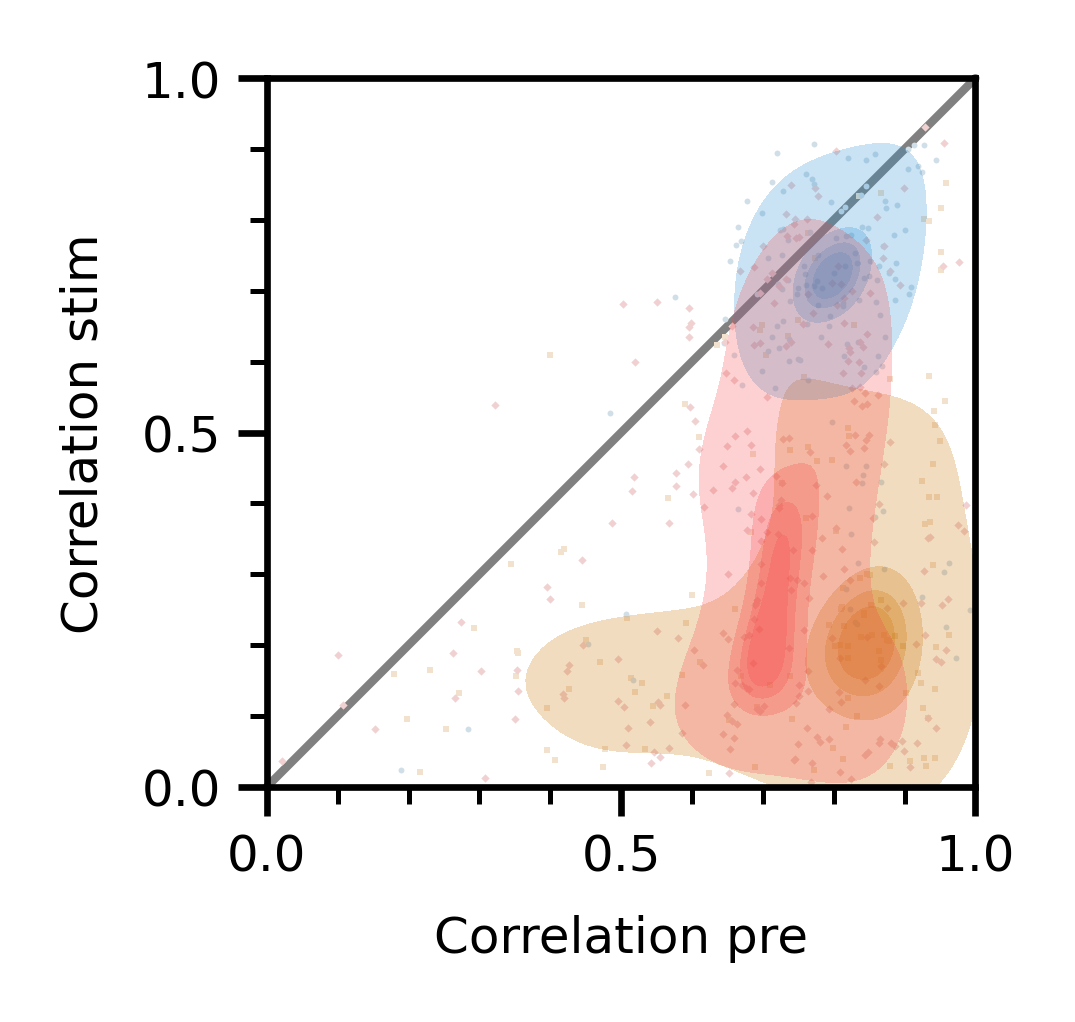

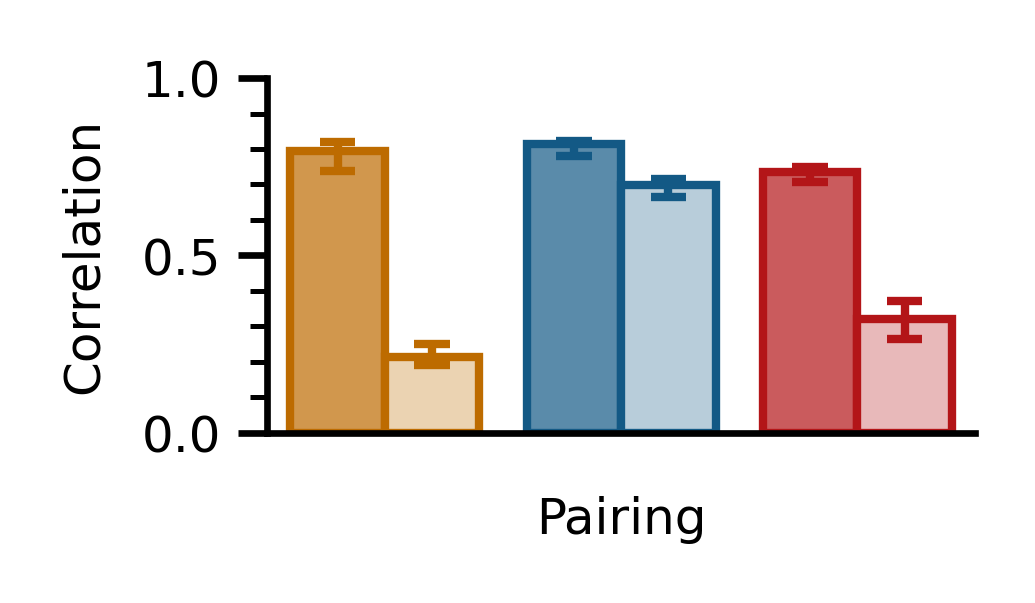

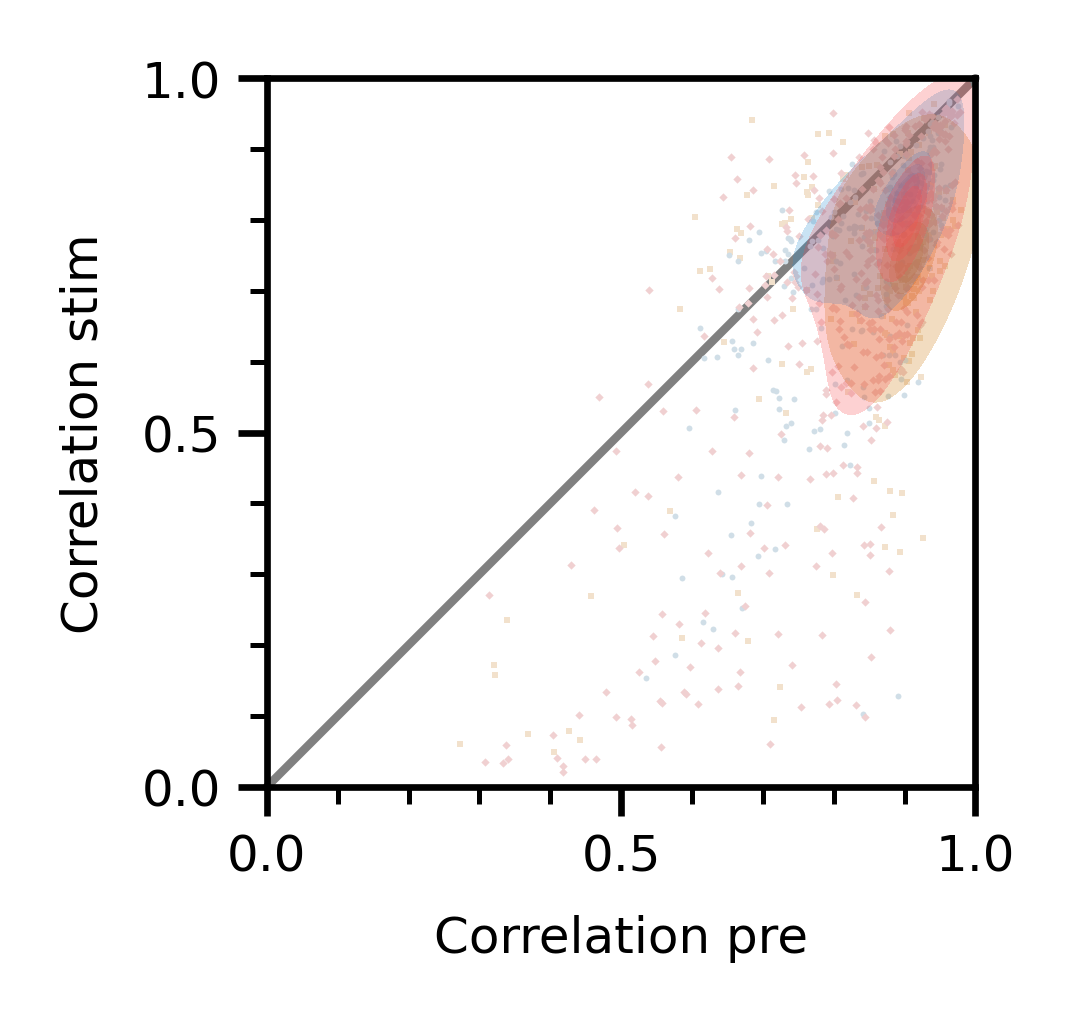

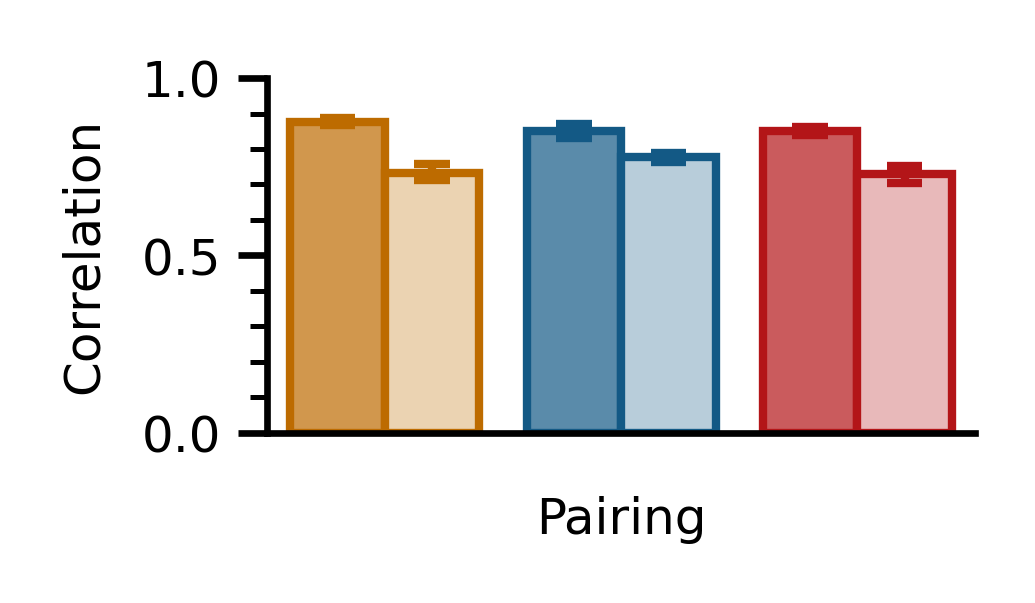

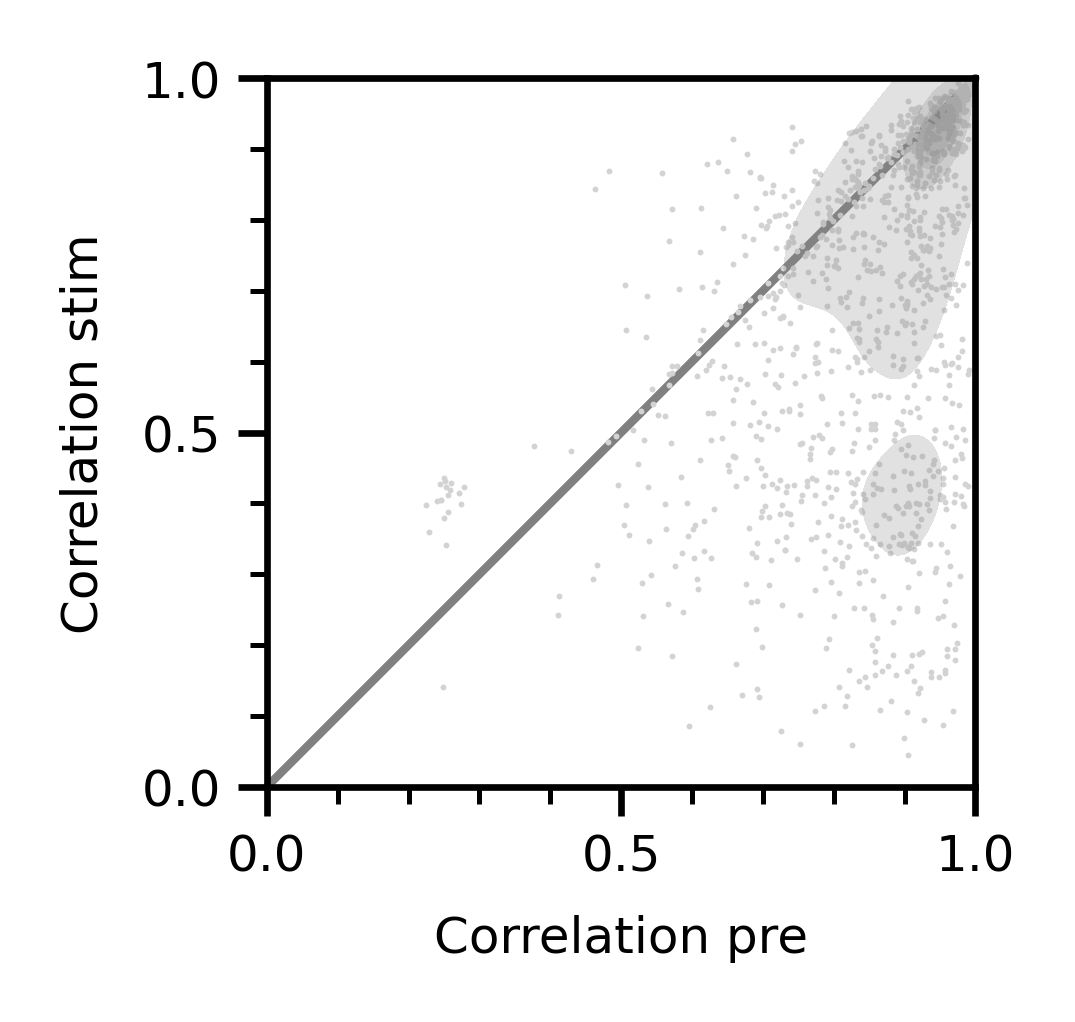

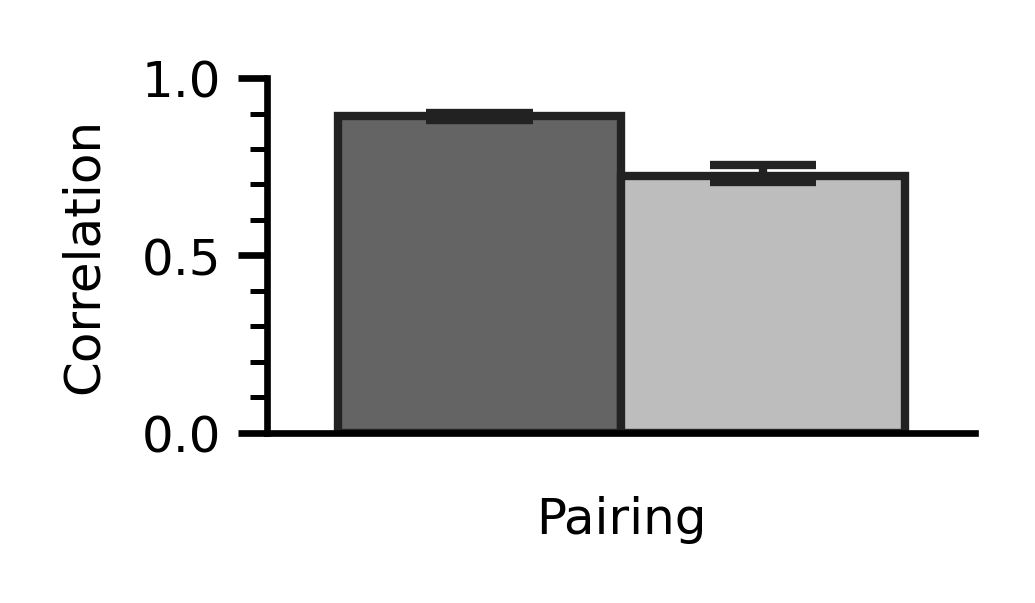

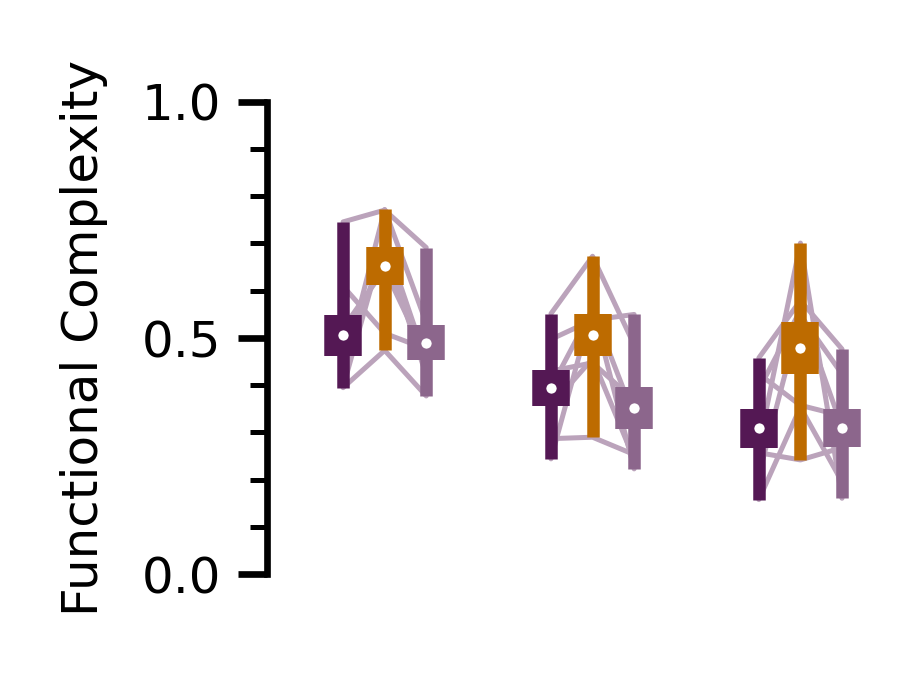

In [3]:
print(pp.fig_2.__doc__)
pp.fig_2()

# Supplemental Material


```bash
python ./ana/process_conditions.py -t sim_partial -i ./dat/simulations/lif/raw/ -o ./dat/simulations/lif/processed/partial/
```



    We can calculate estimates for every trial and see how they change
    within each trial across the conditions (usually, pre  → stim → post).

    Each trial is denoted by a faint purple line, averages across trials
    are denoted as a white dot, with error bars (thick vertical lines) and
    maximal observed values (thin vertical lines).

    We used some custom settings for each observable (plot range etc),
    so they are hidden inside the function definition.

    This has some overlap with fig. 1 and 2
    
p-values: two-sided, paired-sample t-test:


,layout,kind,N,Mean Fraction,Functional Complexity
0,1b,pre-stim,7,0.005091,0.052404
1,1b,stim-post,7,0.014619,0.003747
2,1b,pre-post,7,0.243958,0.539101
3,3b,pre-stim,7,0.036834,0.038360
4,3b,stim-post,7,0.016191,0.016998
5,3b,pre-post,7,0.504848,0.066571
6,merged,pre-stim,7,0.056408,0.046895
7,merged,stim-post,7,0.079732,0.056039
8,merged,pre-post,7,0.881376,0.999212


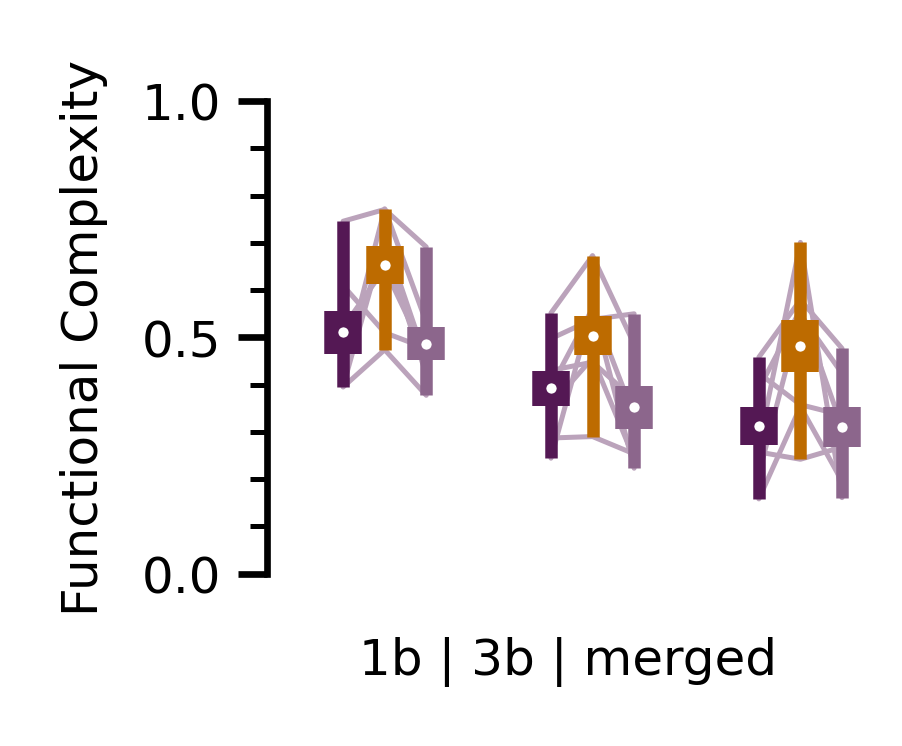

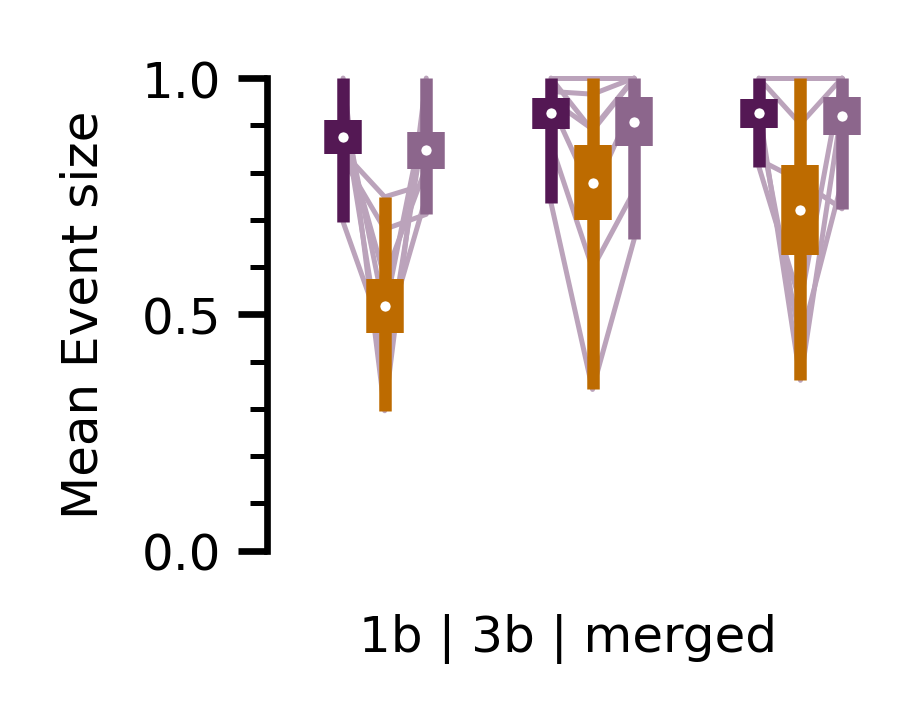

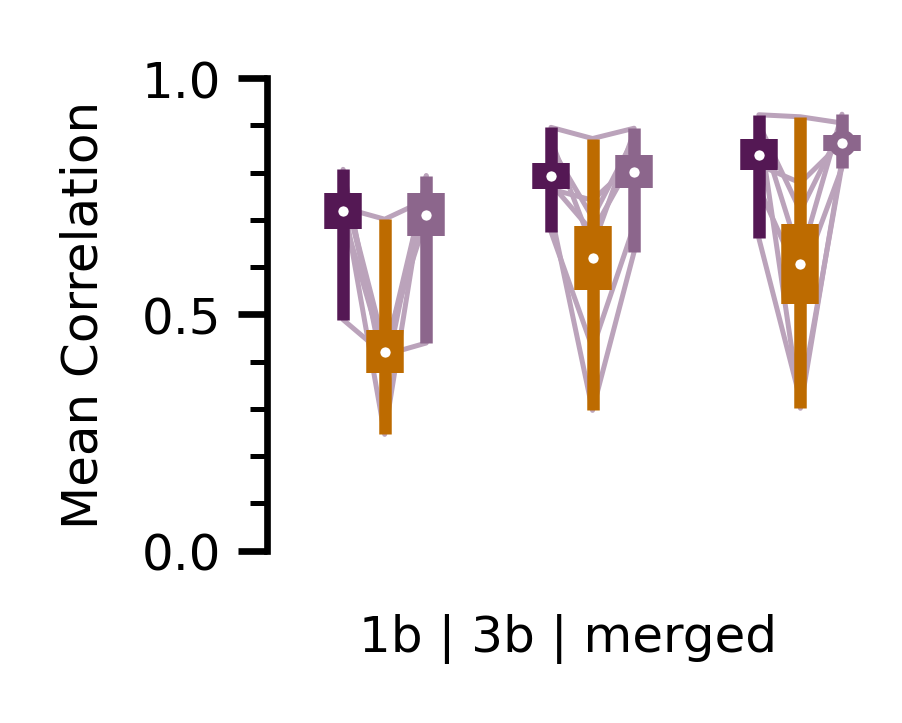

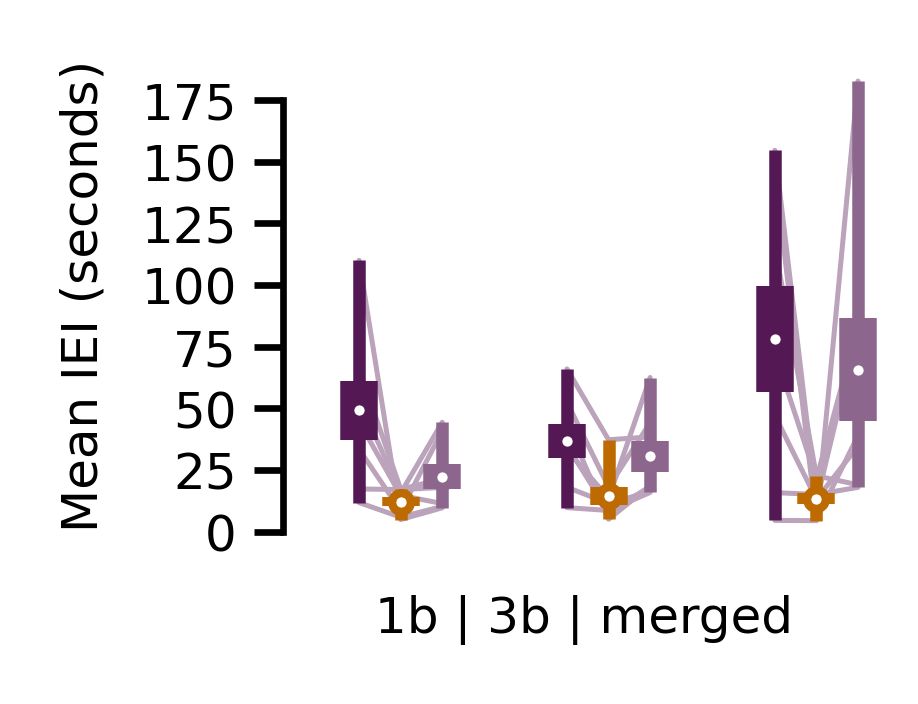

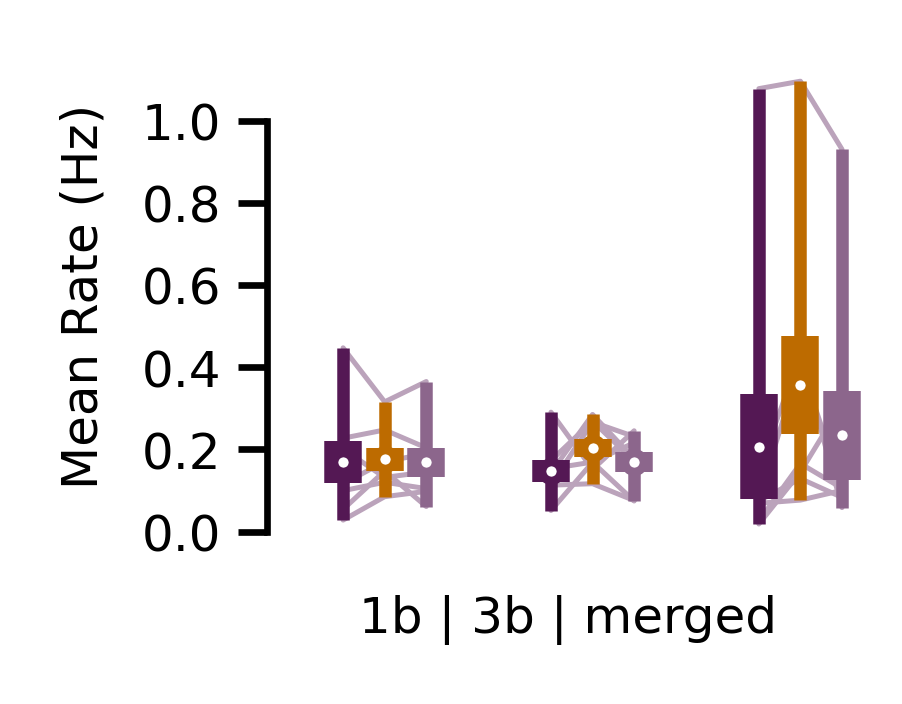

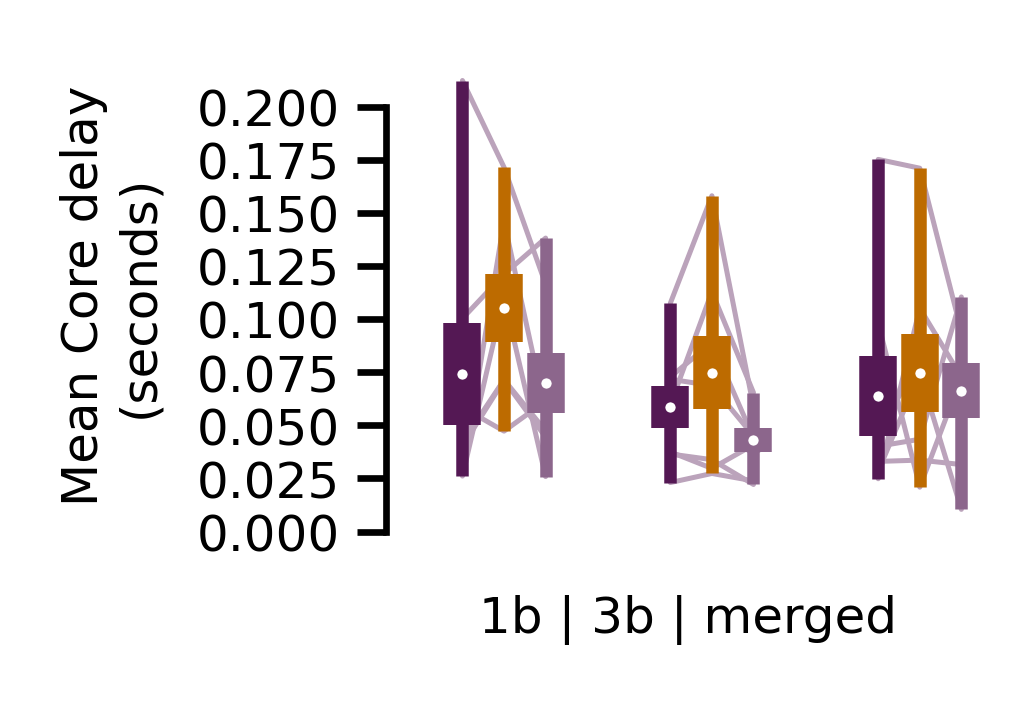

In [4]:
print(pp.sm_exp_trialwise_observables.__doc__)
pp.sm_exp_trialwise_observables(prefix=f"{pp.p_fo}/exp_layouts_sticks")

# the test results are logged at INFO level and
# returned as a pandas dataframe.
# pp.log.setLevel("INFO")
print("p-values: two-sided, paired-sample t-test:")
pp.exp_pairwise_tests_for_trials(
    observables=[
        # "Mean Correlation",
        # "Mean IBI",
        "Mean Fraction", # this is the event size
        "Functional Complexity",
        # "Mean Core delays",
        # "Mean Rate",
        # "Median IBI",
        # "Median Core delays",
    ],
    layouts=["1b", "3b", "merged"],
)